# Bayes Learning Demonstration 1
### Extract the Probability of Heads from a Coin Flip Experiment Using Bayes' Theorem
####  James B. Cole (James.Cole.ctr@afit.edu or james.b.cole.3142@gmail.com), Version 21 May 2018.
Inspired by a program from Capt. Robert Loibl  (10 Feb. 2018).

Bayes' theorem is applied to extract the distribution of $p$, the probabilty that a given coin flip yields heads. 

In [1]:
import math as m
import numpy as np
import random
import matplotlib.pyplot as plt

Data $D = (H,T) $ is the number of heads ($H$) and number of tails ($T$) in a trial set. Probability of heads is $p$. Given $D$ we seek the unknown value of $p$. 

In [2]:
### Set true probability of heads to generate the data ###
#
pH0 = 0.55 # true probability of heads 

#### Probability of Data given $p$ 

\begin{equation*}
      P( D \, | \, p) = \frac{(H + T)! }{H!T!} p^H (1 - p)^T 
\end{equation*}
 This is called a *conditional* probability.

In [3]:
### function to compute probability of data given $p$ (implementation of above) ###
#
# probability of h heads and t tails if probability of heads is p
def probHT(p,h,t):
        return ( p**h * (1.0 - p)**t ) * m.factorial(h+t) / (m.factorial(h) * m.factorial(t))
#
# if $(h+t)$ is much larger than 100 implement this function using Stirling's approximation. 

### Application of Bayes' Theorem
Let $\rho_0$ be the probability distribution of $p$ before any data is collected. This is called the *prior* distribution.  According to Bayes' theorem, the probability distribution of $p$ after collecting the data is distribution.  
\begin{equation*}
\rho_1(p \, | \, D) = \frac{ P( D \, | \, p) \, \rho_0(p) }{ \int_0^1 { dp \, P( D \, | \, p) \, \rho_0(p) } } \,\,\,\,\,\,\,\,\,\,\,\,\, (1) 
\end{equation*}
This is called the *posterior* distribution. 

#### First posterior
Assuming no prior information about the coin we take the prior to be a flat distribution: $\rho_0(p) = 1$ for $0 \le p \le 1 $. Thus 
\begin{align}
\rho_1(p \, | \, D)& =  \frac{ P( D \, | \, p) }{ \int_0^1 { dp \, P( D \, | \, p) } }     \\
                   & =  \frac{(H + T + 1)! }{H!T!} p^H (1 - p)^T \,\,\,(2)
\end{align}


In [4]:
### first posterior distribution (after one set of flips) for flat prior (eqn. 2 above) ###
#
def rho1(p,h,t):
    return ( p**h * (1.0 - p)**t ) * m.factorial(h+t+1) / (m.factorial(h) * m.factorial(t))
#
# if $(h+t)$ is much larger than 100 implement this function using Stirling's approximation. 

Define a Trial Set (set of NF flips). Output is [number of heads, number of tails]

In [5]:
### Function to Generate a Set of Data ###
#
# Heads = 1, Tails = 0. Probability of heads = pH0, of tails = 1 - pH0
#
list_of_weights = [1.0 - pH0,pH0]  
#
# heads (0) or tails (1)
list_of_choices = [0,1]
#
# Define a TrialSet (NT flips)
#
def TrialSet(NF):
    D = [] # intilalize data list
    D = random.choices(list_of_choices, weights = list_of_weights, k = NF)
    H = sum(D)          # number of heads
    T = NF - H          # number of tails
    result = [H,T]
    return result

Define disretized probability distributions. **Nd** equally spaced probabilities $0 \le p \le 1$. 

**Note:** the discretization limits the accuracy of the Bayesian estimate of $p$. 

In [6]:
# Set Number of discrete probability values
Nd = 200

In [7]:
# array of Nd equally spaced probability values from 0.0 to 1.0    

delta_p = 1.0 / float(Nd)  # probability interval; and resolution of the Bayesian estimate
#
pvalues = np.arange(0.5*delta_p,1.0,delta_p)  # array

define auxilliary functions

In [8]:
# multiply two lists element by element; output array
#
def MultLists(X,Y):
    AX = np.array(X)
    AY = np.array(Y)
    return AX*AY
#
# numerically integrate two lists of values; output array 
#
def IntegLists(X,Y):
    S = MultLists(X,Y)
    return sum(S) / float(Nd)
#
#### functions used to determine a confidence band about the peak value of the posterior distribution
#
# Sum forwards from index j until sum = f*total_sum (0<= f <= 1); output higest index in sum  
def forwSum_p(X,j,f):
    TS = sum(X)
    i = j
    S = X[i]
    if S >= f*TS:
        return j
    else:
        while i <= Nd:
            S = S + X[i]
            if S < f*TS and i == Nd:     
                return Nd+1          # if all terms forward from j fail to add to f*total_sum, output Nd+1
            if S >= f*TS:
                return i
            else:
                i = i+1 
#
# Sum backwards from index j until sum >= f*total_sum, output lowest index in sum
def backSum_p(X,j,f):
    TS = sum(X)
    i = j
    S = X[i]
    if S >= f*TS:
        return j
    else:
        while i >= 0:
            S = S + X[i]
            if S < f*TS and i == 0:
                return -1             # if all terms backward from j fail to add to f*total_sum, output -1
            if S >= f*TS:
                return i
            else:
                i = i-1
#
def twosidedSum(X,j,f):
    lower = backSum_p(X,j,0.5*f)
    upper = forwSum_p(X,j,0.5*f)
    return [lower,upper]

Set number of flips (**NF**) flips in all Trial Sets) 

In [9]:
NF = 32

Set confidence band about peak of Bayesian estimate
**Note:** if **f_conf** (set below) is too large (especially when distribution is skewed towards 0 or 1, the indices output by **lower_upper** may go out of bounds.   

In [10]:
f_conf = 0.75

#### Trial 1
Run first Trial Set and obtain first posterior distribution using eqn. 2.

probabilty of heads = 0.55 , estimate1 =  0.719  estimate2 =  0.717
Check normalization: integral of posterior =  1.0
TrialSet =  1


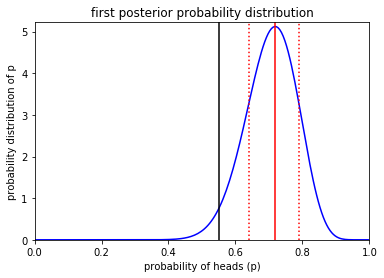

In [11]:
### Trial 1, generate first posterior from a set of data ###
#
Result = TrialSet(NF)
H = Result[0]
T = Result[1]
#
# start running total of heads amd tails over all trials
NumHeads = H
NumTails = T
#
### compute the 1st posterior using eqn. (2) ###
#
posterior = [rho1(pvalues[i],H,T) for i in range(0,Nd)]   # this a list  
#
# Check normalization of the posterior probability distribution
normalization = sum(posterior)/float(Nd)         # integrate probability density 
normalization = round(normalization,5)           # round it off
#
# estimate probability of heads:
# estimate 1: pH0 = H/(T+H)
est1 = round(float(NumHeads) / float(NumHeads + NumTails), 3)
#
# estimate 2: use location of the peak of the posterior distribution 
peak_index = posterior.index(max(posterior))  
prob_peak = pvalues[peak_index]    
est2 = round(prob_peak,3)           
#
# start list of errors 
err1 = [est1 - pH0]   # error of the Bayes estimate
err2 = [est2 - pH0]   # error of the simple estimate
#
# running list of the total number of flips after each TrialSet
flips = [NF]    
#
# compute confidence bands about peak of posterior distribution
[lower,upper] = twosidedSum(posterior,peak_index,f_conf)    
lower = float(lower)*delta_p
upper = float(upper)*delta_p
#
print("probabilty of heads =", pH0, ", estimate1 = ", est1, " estimate2 = ", est2)
print("Check normalization: integral of posterior = ", normalization)
print("TrialSet = ", 1)
#
plt.xlim(0.0,1.0)
plt.xlabel('probability of heads (p)')
plt.ylabel('probability distribution of p')
#
plt.ylim(0.0, max(posterior) + 0.1)
#
plt.plot(pvalues, posterior, color = "b" )
plt.axvline(x=pH0, color = "k", linestyle = "-")       # true probabilty of heads with verical line
plt.axvline(x=lower, color = "r", linestyle = ":")     # lower confidence bound
plt.axvline(x=upper, color = "r", linestyle = ":")     # upper confidence bound
plt.axvline(x=prob_peak, color = "r", linestyle = "-") # postion of the peak
#
plt.title('first posterior probability distribution')
#
plt.show()

Above graph is the posterior distribution after the zeroth Trial Set.
In the next set of flips $\rho_1(p \, | \, D) \to \rho_0(p)$ in eqn. (1)

Verical black line indicates true value, vertical red dotted lines indicate confidence band about peak

#### Intialize and then run **NTrials** Trial Sets

probabilty of heads =  0.55 , estimate1 =  0.641  estimate2 =  0.642
Check normalization: integral of posterior =  1.0
TrialSet =  2


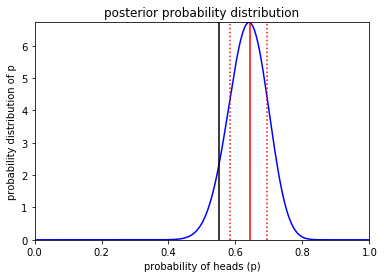

probabilty of heads =  0.55 , estimate1 =  0.583  estimate2 =  0.582
Check normalization: integral of posterior =  1.0
TrialSet =  3


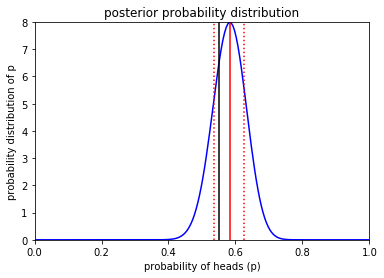

probabilty of heads =  0.55 , estimate1 =  0.57  estimate2 =  0.572
Check normalization: integral of posterior =  1.0
TrialSet =  4


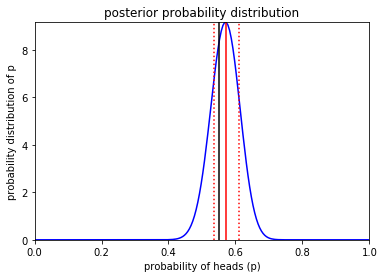

probabilty of heads =  0.55 , estimate1 =  0.569  estimate2 =  0.567
Check normalization: integral of posterior =  1.0
TrialSet =  5


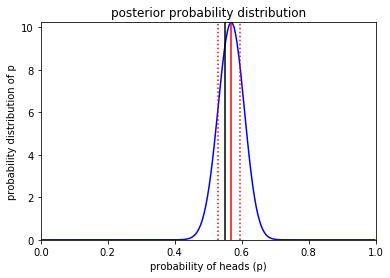

probabilty of heads =  0.55 , estimate1 =  0.552  estimate2 =  0.552
Check normalization: integral of posterior =  1.0
TrialSet =  6


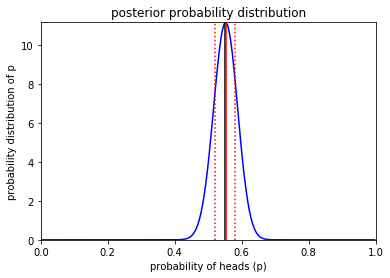

probabilty of heads =  0.55 , estimate1 =  0.54  estimate2 =  0.542
Check normalization: integral of posterior =  1.0
TrialSet =  7


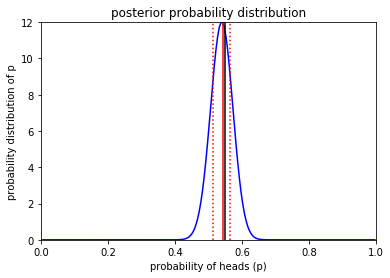

probabilty of heads =  0.55 , estimate1 =  0.543  estimate2 =  0.542
Check normalization: integral of posterior =  1.0
TrialSet =  8


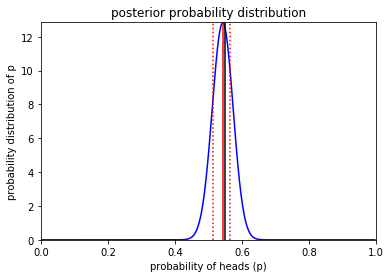

probabilty of heads =  0.55 , estimate1 =  0.556  estimate2 =  0.557
Check normalization: integral of posterior =  1.0
TrialSet =  9


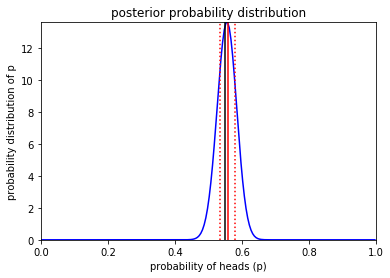

probabilty of heads =  0.55 , estimate1 =  0.55  estimate2 =  0.547
Check normalization: integral of posterior =  1.0
TrialSet =  10


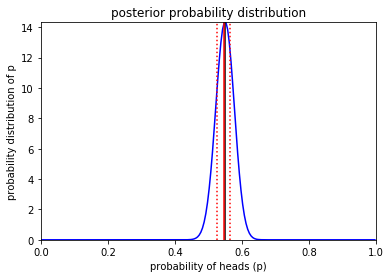

probabilty of heads =  0.55 , estimate1 =  0.54  estimate2 =  0.537
Check normalization: integral of posterior =  1.0
TrialSet =  11


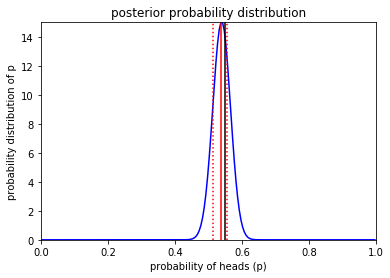

probabilty of heads =  0.55 , estimate1 =  0.549  estimate2 =  0.547
Check normalization: integral of posterior =  1.0
TrialSet =  12


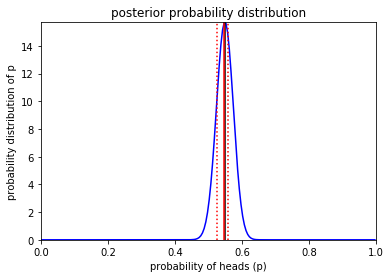

probabilty of heads =  0.55 , estimate1 =  0.546  estimate2 =  0.547
Check normalization: integral of posterior =  1.0
TrialSet =  13


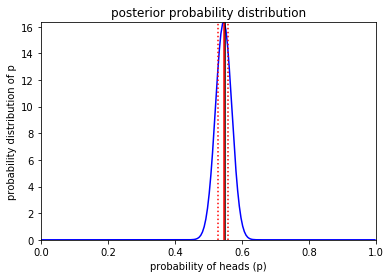

probabilty of heads =  0.55 , estimate1 =  0.549  estimate2 =  0.547
Check normalization: integral of posterior =  1.0
TrialSet =  14


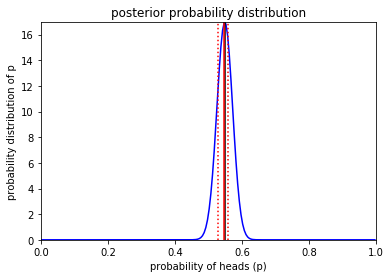

probabilty of heads =  0.55 , estimate1 =  0.554  estimate2 =  0.552
Check normalization: integral of posterior =  1.0
TrialSet =  15


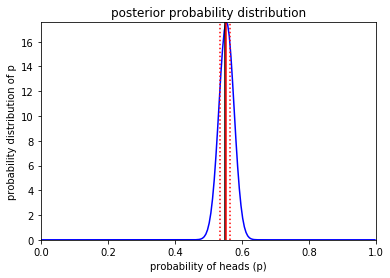

probabilty of heads =  0.55 , estimate1 =  0.549  estimate2 =  0.547
Check normalization: integral of posterior =  1.0
TrialSet =  16


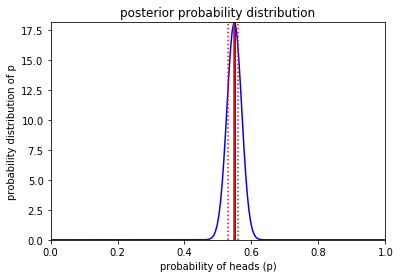

In [12]:
### Subsequent Trial Sets ###
#
# Use the posterior of the previous trial set as the prior of the next

### Initialization of Loop ###
#
# set number of TrialSets to run
Ntrials = 16 
#
itrial = 2
#
# start iteration
#
while itrial <= Ntrials:
#
    Result = TrialSet(NF)
    H = Result[0]
    T = Result[1]
#
# running total of the number of H and T over all Trial Sets
    NumHeads = NumHeads + H
    NumTails = NumTails + T
#
### compute the new posterior using eqn. (1) and the posterior of the previous Trial Set  ###
    pHT = [ probHT(pvalues[i],H,T) for i in range(0,Nd) ]
#
    numerator = MultLists(pHT,posterior)
    denominator = IntegLists(pHT,posterior)
    posterior = numerator / denominator
    posterior = posterior.tolist()       # must be a list (not array) to extract peak
#
# Check normalization of the posterior probability distribution
    normalization = sum(posterior)/float(Nd)    # integrate probability density 
    normalization = round(normalization,5)      # round it off
#
# estimate 1: probability of heads = H/(T+H)
    est1 = round( float(NumHeads) / float(NumHeads + NumTails), 3)    
# compute error of estimate 1 and append to list
    err1.append(est1 - pH0)   
#
# estimate 2: use location of the peak of the posterior distribution 
#
    peak_index = posterior.index(max(posterior))  
    prob_peak = pvalues[peak_index]    # probability corresponding to posterior peak
    est2 = round(prob_peak,3)          # round it off
    err2.append(est2 - pH0)            # error2 list
#
    last = len(flips)-1
    flips.append(NF + flips[last])     # update list of number of flips                
# 
# compute confidence bands about peak of posterior distribution
    [lower,upper] = twosidedSum(posterior,peak_index,f_conf)    
    lower = float(lower)*delta_p
    upper = float(upper)*delta_p    
#
    print("probabilty of heads = ", pH0, ", estimate1 = ", est1, " estimate2 = ", est2)
    print("Check normalization: integral of posterior = ", normalization)
    print("TrialSet = ", itrial)
#   
    plt.plot(pvalues, posterior, color = "b" )
    plt.axvline(x=pH0, color = "k", linestyle = "-")        # true probabilty of heads with verical line
    plt.axvline(x=lower, color = "r", linestyle = ":")      # lower confidence bound
    plt.axvline(x=upper, color = "r", linestyle = ":")      # upper confidence bound
    plt.axvline(x=prob_peak, color = "r", linestyle = "-")  # postion of the peak
#
    plt.xlabel('probability of heads (p)')
    plt.ylabel('probability distribution of p')
#
    plt.xlim(0.0,1.0)
    plt.ylim(0.0, max(posterior))
#
    plt.title('posterior probability distribution')
#
    plt.show()
    itrial = itrial + 1

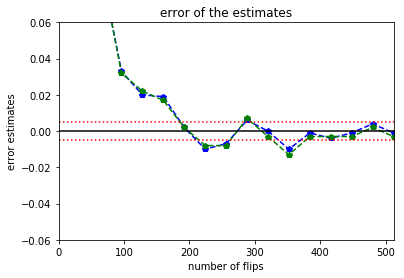

resolution of estimate2 red dots) limited by discretization, resolution =  0.005


In [13]:
plt.plot(flips, err1, color = "b", marker = "p", linestyle = "--")
plt.plot(flips, err2, color = "g", marker = "p", linestyle = "--")
#
# show resolution limits
plt.axhline(y= delta_p, color = "r", linestyle = ":")
plt.axhline(y= 0.0, color = "k", linestyle = "-")
plt.axhline(y= -delta_p, color = "r", linestyle = ":")
#
plt.xlabel('number of flips')
plt.ylabel('error estimates')
#
total_flips = flips[len(flips)-1]
plt.xlim(0,total_flips)
plt.ylim(-12.0*delta_p,12.0*delta_p)
plt.title("error of the estimates")
#
plt.show()
#
print("resolution of estimate2 red dots) limited by discretization, resolution = ", round(delta_p,4) )